# Check quality of HCP dataset images and attempt to segment the brain.

In [1]:
import os
import random
import nibabel as nib
from pathlib import Path
import matplotlib.pyplot as plt

In [9]:
hcp_path = Path('../Datasets/HCP/hcp')

patient_file_path = os.path.join(hcp_path, os.listdir(hcp_path)[1], 'T1w')

nifti_path = os.path.join(patient_file_path, os.listdir(patient_file_path)[0])

nifti_path

'../Datasets/HCP/hcp/100307/T1w/T1w_acpc_dc_restore_1.25.nii.gz'

In [10]:
nib_object = nib.load(nifti_path)
patient_array = nib_object.get_fdata()

patient_array.shape

(145, 174, 145)

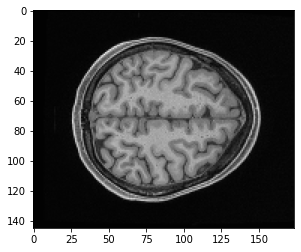

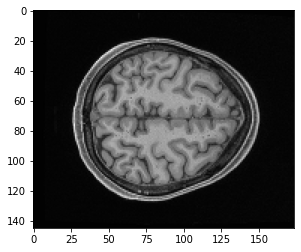

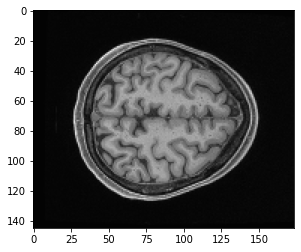

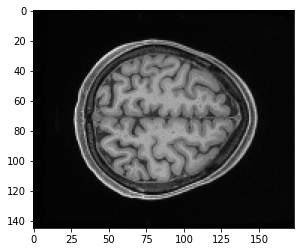

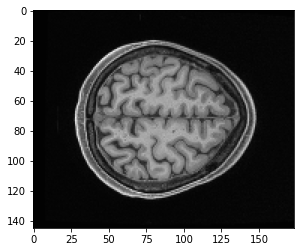

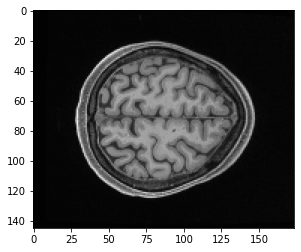

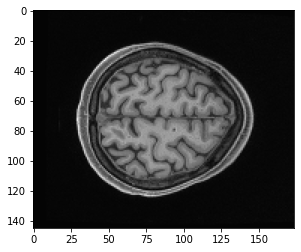

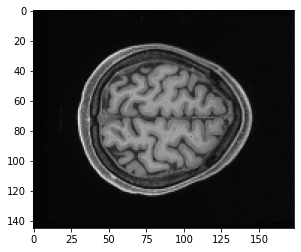

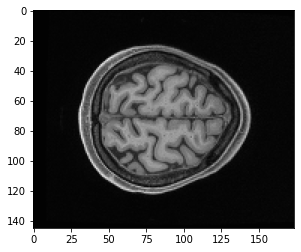

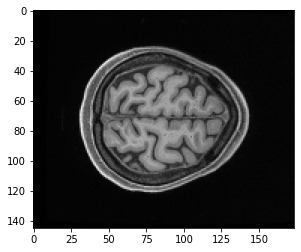

In [11]:
for slice_idx in range(90, 100):
    plt.imshow(patient_array[:,:,slice_idx], cmap='gray')
    plt.show()

## Run skull stripping command from command line insine nifti file's folder: "deepbrain-extractor -i T1w_acpc_dc_restore_1.25.nii.gz -o ."

In [12]:
os.listdir(patient_file_path)

['brain.nii', 'brain_mask.nii', 'T1w_acpc_dc_restore_1.25.nii.gz']

In [14]:
brain_file = os.path.join(patient_file_path, 'brain.nii')
brainmask_file = os.path.join(patient_file_path, 'brain_mask.nii')

brain_object = nib.load(brain_file)
brain_array = brain_object.get_fdata()

brainmask_object = nib.load(brainmask_file)
brainmask_array = brainmask_object.get_fdata()

brain_array.shape, brainmask_array.shape

((145, 174, 145), (145, 174, 145))

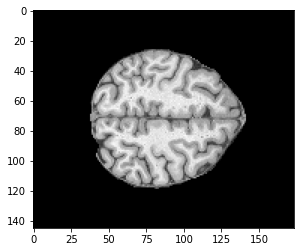

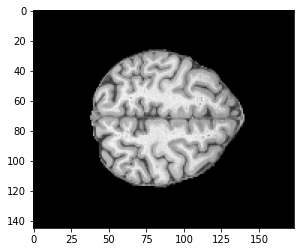

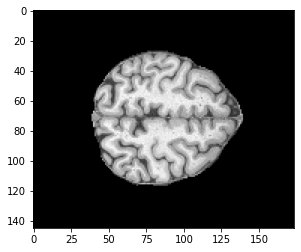

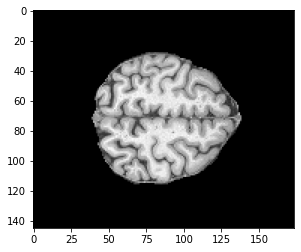

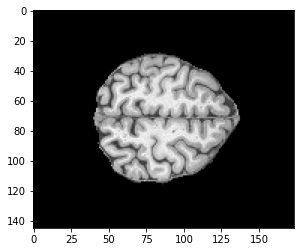

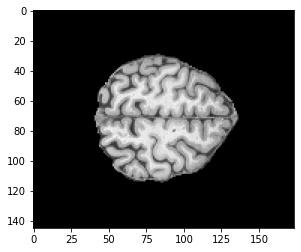

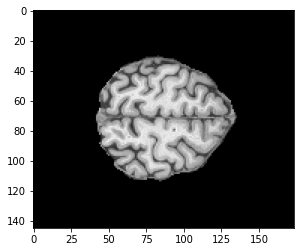

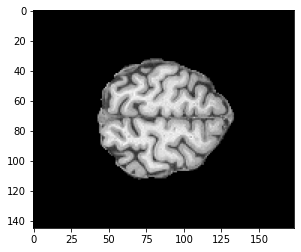

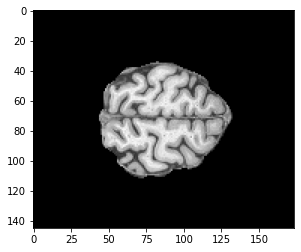

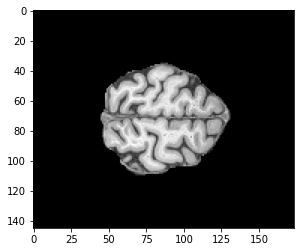

In [15]:
for brain_slice_idx in range(90, 100):
    plt.imshow(brain_array[:,:,brain_slice_idx], cmap='gray')
    plt.show()

### Verification of brain segmentation from other angles. 

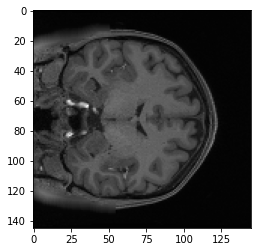

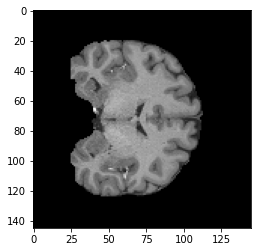

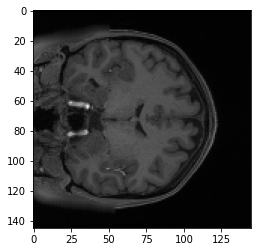

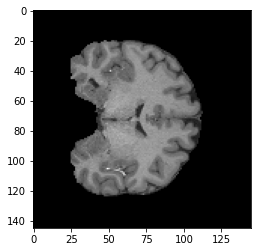

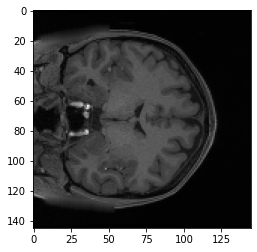

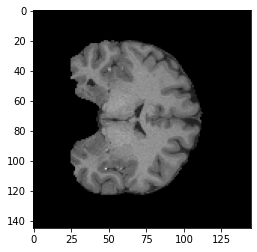

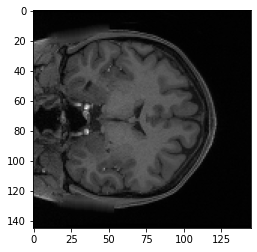

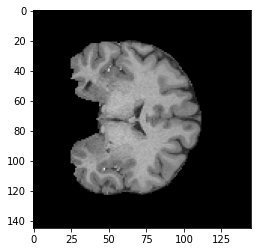

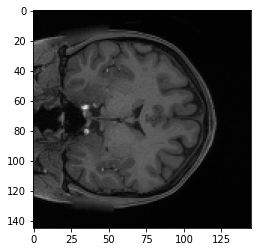

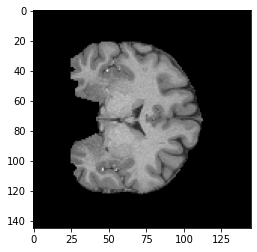

In [16]:
for slice_idx in range(95, 100):
    plt.imshow(patient_array[:,slice_idx,:], cmap='gray')
    plt.show()

    plt.imshow(brain_array[:,slice_idx,:], cmap='gray')
    plt.show()

## For patients without cancer, the brain segmentation was quite satisfactory.